In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [29]:
# Load dataset
df = pd.read_csv("Salary Data.csv")

# Drop missing values
df.dropna(inplace=True)

# Check cleaned data
print(df.info())
display(df)# Encode each

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB
None


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [31]:

# Create LabelEncoders
le_gender = LabelEncoder()
le_edu = LabelEncoder()
le_job = LabelEncoder()

# Encode each
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Education Level'] = le_edu.fit_transform(df['Education Level'])
df['Job Title'] = le_job.fit_transform(df['Job Title'])

df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


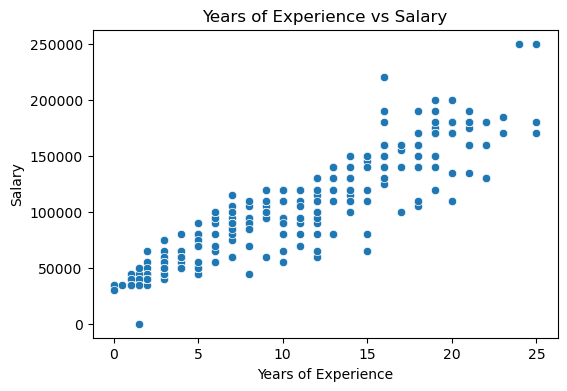

In [17]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Years of Experience", y="Salary", data=df)
plt.title("Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


In [18]:
st.subheader("Salary by Education Level")
fig2, ax2 = plt.subplots()
sns.boxplot(x="Education Level", y="Salary", data=df, ax=ax2)
st.pyplot(fig2)


DeltaGenerator()

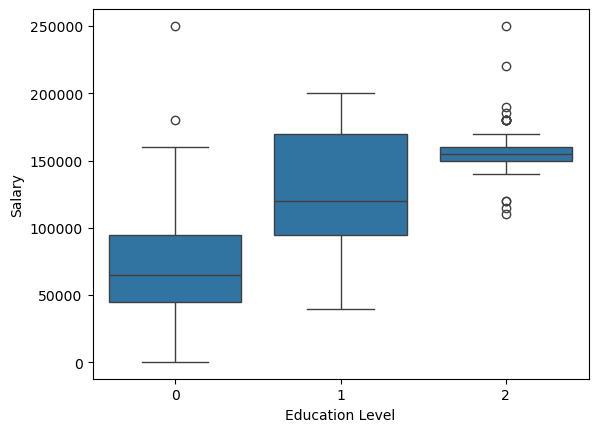

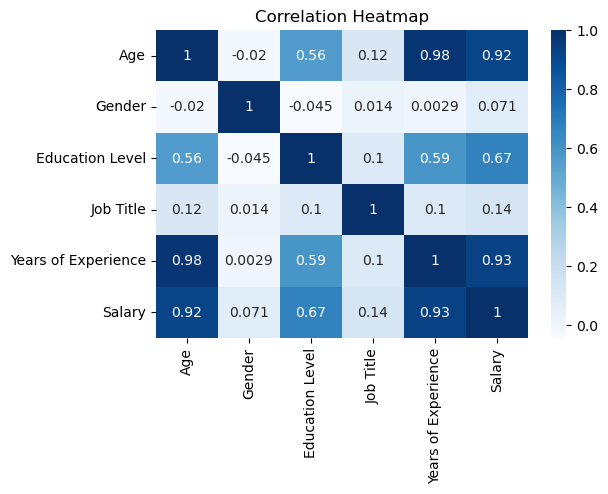

In [19]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


In [26]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

# Train on full dataset (no test split)
model = RandomForestRegressor()
model.fit(X, y)

# Predict on the full dataset
predictions = model.predict(X)

# Evaluate on full dataset
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print("MSE:", mse)
print("R² Score:", r2)

# Save the trained model
joblib.dump(model, "salary_model.pkl")

MSE: 24173570.94454212
R² Score: 0.9895842185072116


['salary_model.pkl']

In [27]:
joblib.dump(le_gender, "le_gender.pkl")
joblib.dump(le_edu, "le_edu.pkl")
joblib.dump(le_job, "le_job.pkl")


['le_job.pkl']